This notebook tests the simulation of harmonic acoustic pressure fields using the `pymust` library.

We will define transducer parameters, calculate the pressure field within specified boundaries, and visualize the resulting harmonic field.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pymust

In [2]:
param = pymust.getparam('P4-2v')
param.bandwidth = 20
param.attenuation = 0.5
xf = 0
zf = 5e-2
txdel= pymust.txdelay(xf, zf, param)
param.c = 1540

xbound = np.array([-4e-2,4e-2]) # in m
zbound = np.array([0,10e-2]) # in m


In [ ]:
# Call the funcion
P1, SPECT_P1, IDX, _ = pymust.harmonic.pfield(xbound, zbound, txdel, param)

DEBUG - Number of grid points in x: 389
DEBUG - of grid points in z: 485


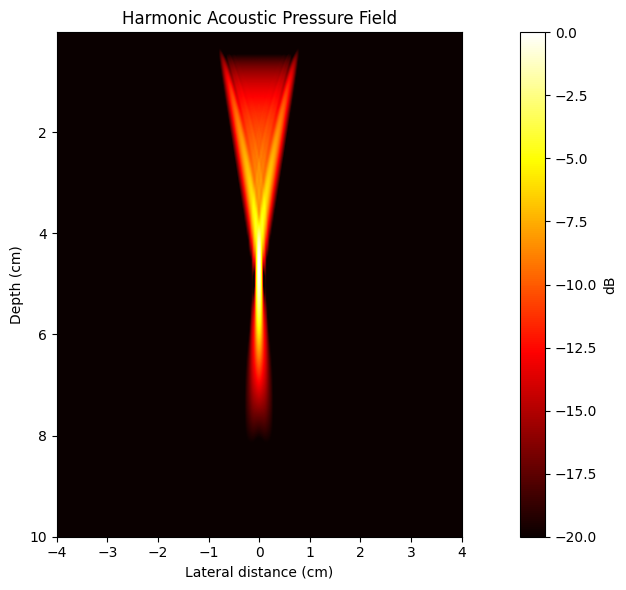

In [6]:
# Plot the results
def to_db(x):
    return 20*np.log10(np.abs(x)/np.max(np.abs(x)))

plt.figure(figsize=(12, 6))
extent_cm = [xbound[0]*100, xbound[1]*100, zbound[1]*100, zbound[0]*100]
plt.imshow(to_db(P1), cmap='hot', extent=extent_cm, aspect='auto')
plt.clim(-20, 0)
plt.colorbar(label='dB')
plt.xlabel('Lateral distance (cm)')
plt.ylabel('Depth (cm)')
plt.title('Harmonic Acoustic Pressure Field')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()